In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from poibin import PoiBin
from tqdm import tqdm

In [2]:
df = pd.read_csv(r"C:\repository\understat_shot_data\shots.csv")
df = df.loc[df["result"] != "OwnGoal"].reset_index(drop=True)

In [3]:
df.head()

,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.707,0.379,0,Hoffenheim,29-08-2015 17:30,h,0,Darmstadt,76737,Aerial,1044,93,György Garics,NaN,2,MissedShots,2015,RightFoot,FromCorner,0.011869
1,0.728,0.373,1,Darmstadt,12-09-2015 17:30,a,0,Bayer Leverkusen,76808,Pass,1053,1,György Garics,Konstantin Rausch,2,SavedShot,2015,RightFoot,SetPiece,0.015980
2,0.875,0.521,2,Darmstadt,20-12-2015 20:30,a,3,Borussia M.Gladbach,79876,Aerial,1173,58,György Garics,NaN,2,MissedShots,2015,Head,FromCorner,0.016684
3,0.927,0.557,2,Werder Bremen,07-12-2014 16:30,a,5,Eintracht Frankfurt,27374,Pass,5320,78,Luca Caldirola,Fin Bartels,3,Goal,2014,LeftFoot,OpenPlay,0.432700
4,0.899,0.598,2,Darmstadt,27-09-2015 19:30,a,2,Borussia Dortmund,77444,None,1083,11,Luca Caldirola,NaN,3,MissedShots,2015,RightFoot,SetPiece,0.072897


In [4]:
groups = df.groupby(["match_id", "h_a"])

In [5]:
match_ids = []
home_away = []
xgs = []
goals = []
for g in tqdm(groups):
    match_ids.append(g[0][0])
    home_away.append(g[0][1])
    xgs.append(g[1]["xG"].to_numpy())
    goals.append(g[1].a_goals.unique()[0] if g[0][1] == "a" else g[1].h_goals.unique()[0]) ##get away goals or home goals depending on the size

100%|███████████████████████████████| 21094/21094 [00:46<00:00, 451.56it/s]


In [6]:
grouped = pd.DataFrame(zip(match_ids, home_away, xgs, goals), 
                       columns= ["match_id", "home_away", "shot_xgs", "goals"])    
grouped.head(3)

,match_id,home_away,shot_xgs,goals
0,81,a,"[0.07305785299999999, 0.02103884, 0.0359582529...",0
1,81,h,"[0.10434672199999999, 0.09214139, 0.057156816,...",1
2,82,a,"[0.018269068, 0.11366789, 0.052679669000000005...",1


In [7]:
def get_probability(arg):
    pb = PoiBin(arg[0])
    n_shots = len(arg[0]) 
    if arg[1] == 0:
        return pb.pmf(0)
    else:
        return 1-pb.cdf(arg[1]-1)
    
grouped["prob"] = grouped[["shot_xgs", "goals"]].apply(get_probability, axis=1)

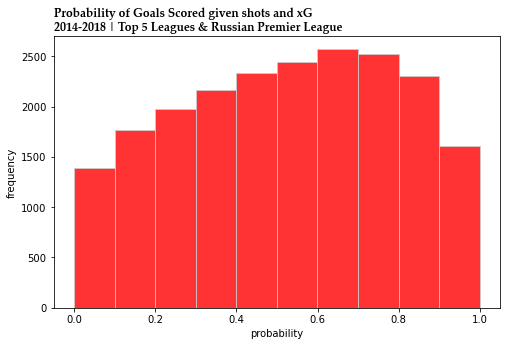

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(grouped["prob"], color="red", alpha=.8, edgecolor='.8')
ax.set(xlabel="probability", ylabel="frequency", title="Probability of Goals Scored given shots and xG\n2014-2018 | Top 5 Leagues & Russian Premier League")
ax.title.set(x=0, ha="left", fontweight="bold", fontname="Palatino Linotype")

##fig.savefig("test.png", dpi=100)